In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import time
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# 3.1

In [2]:
diabetes_data=pd.read_excel('./data/Diabetes_Data.xlsx')
Y=diabetes_data['Y']
explanatory_variables=list(diabetes_data.columns)
explanatory_variables.remove('Y')
explanatory_variables_data=diabetes_data[explanatory_variables]

# Correlation Matrix
corr_matrix=explanatory_variables_data.corr()
corr_matrix

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


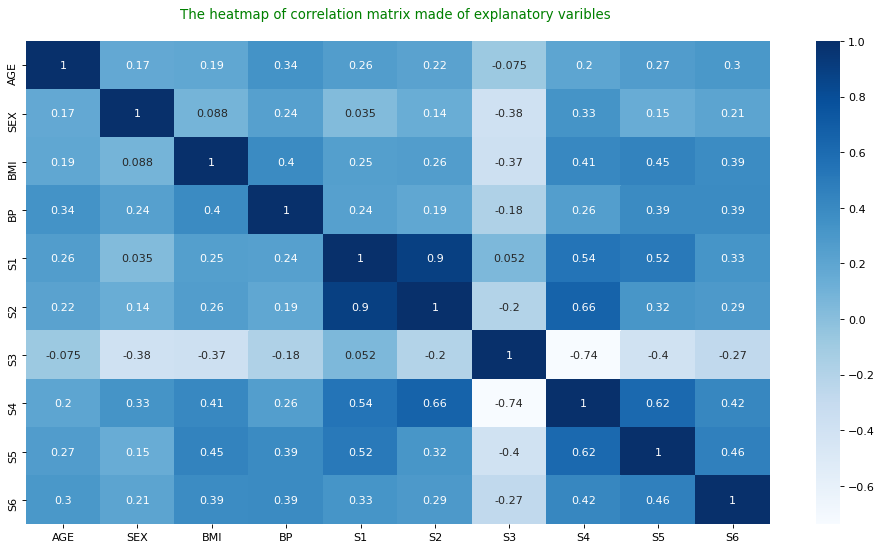

In [3]:
# Making a heat-map of a matrix

plt.figure(figsize=(15, 8), dpi=80)
sns.heatmap(corr_matrix,annot=True, cmap='Blues',cbar=True)
plt.title('The heatmap of correlation matrix made of explanatory varibles \n', color='green')
plt.show()

In [4]:
# Decribe the relationship between the variables, Available in the report

# 3.3

In [5]:
# Using explanatory variables
x = sm.add_constant(explanatory_variables_data)
model1=sm.OLS(Y,x)
model1=model1.fit()
predicted_value=model1.predict(x)

print(x)

# Calculating Adjusted-R-Square
model_summary=model1.summary2() #Summary of the model.
table0=model_summary.tables[0]
table0.columns=['Info','two','names','values']
values=table0['values']
adjusted_r_square=values[0] # R-Square value

# Finding Mean-Squared Error
MSE=mean_squared_error(Y,predicted_value) # Mean-Square Error value
print(f"Mean Square Error: {MSE}")
print(f"Adjusted R-Square: {adjusted_r_square}")

# Finding the significant variables
table1=model_summary.tables[1]
table1.columns=['coefficient','standard_error','t','p_values','0.025','0.975']
pvalues_data=table1[['p_values']]

## Showing significant variables ordered fro the most significant variable (less p_value)
significant_variables=pvalues_data[pvalues_data['p_values'] < 0.05]
significant_variables=pd.DataFrame(significant_variables,columns = significant_variables.columns,
                  index = list(significant_variables.index)[1:])

significant_variables=significant_variables.sort_values('p_values')

print("\nThe significant  variables are:",end=' ')
print(list(significant_variables.index))
print("\n \n")

# show the summary model
print(model_summary)

     const  AGE  SEX   BMI      BP   S1     S2    S3    S4      S5   S6
0      1.0   59    2  32.1  101.00  157   93.2  38.0  4.00  4.8598   87
1      1.0   48    1  21.6   87.00  183  103.2  70.0  3.00  3.8918   69
2      1.0   72    2  30.5   93.00  156   93.6  41.0  4.00  4.6728   85
3      1.0   24    1  25.3   84.00  198  131.4  40.0  5.00  4.8903   89
4      1.0   50    1  23.0  101.00  192  125.4  52.0  4.00  4.2905   80
..     ...  ...  ...   ...     ...  ...    ...   ...   ...     ...  ...
437    1.0   60    2  28.2  112.00  185  113.8  42.0  4.00  4.9836   93
438    1.0   47    2  24.9   75.00  225  166.0  42.0  5.00  4.4427  102
439    1.0   60    2  24.9   99.67  162  106.6  43.0  3.77  4.1271   95
440    1.0   36    1  30.0   95.00  201  125.2  42.0  4.79  5.1299   85
441    1.0   36    1  19.6   71.00  250  133.2  97.0  3.00  4.5951   92

[442 rows x 11 columns]
Mean Square Error: 2859.69634758675
Adjusted R-Square: 0.507

The significant  variables are: ['BMI', 'BP', 'S5

# 3.5

In [6]:
# I am using Y and x variables from the above sub-question
## Start with forward_selection function, Now because we want to view the steps, verbose will be True
def forward_regression(X, y,
                       threshold_in,
                       verbose=True):
    print(f"Steps to select significant variable \n")
    initial_list = []
    included = list(initial_list)
    i=1
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print(f"Iteration {i}:     ",end='')
                print('Add  {:15} with p-value {:.6}'.format(best_feature, best_pval))
                print(f"Remaining Variables: {excluded}")
                print(f"Selected Variables: {included}")
                print("\n")
                time.sleep(3)

        if not changed:
            break
        i+=1

    return included

# call forward_regression function and pass Y and x
warnings.filterwarnings('ignore')
threshold=0.05
selected_variables_from_forward_regression=forward_regression(x,Y,threshold)
print(f"The final selected variable are: {selected_variables_from_forward_regression}")

Steps to select significant variable 

Iteration 1:     Add  const           with p-value 2.40471e-154
Remaining Variables: ['const', 'SEX', 'S6', 'S2', 'AGE', 'BMI', 'S3', 'S1', 'S5', 'S4', 'BP']
Selected Variables: ['const']


Iteration 2:     Add  BMI             with p-value 3.46601e-42
Remaining Variables: ['SEX', 'S6', 'S2', 'AGE', 'BMI', 'S3', 'S1', 'S5', 'S4', 'BP']
Selected Variables: ['const', 'BMI']


Iteration 3:     Add  S5              with p-value 3.03963e-20
Remaining Variables: ['SEX', 'S6', 'S2', 'AGE', 'S3', 'S1', 'S5', 'S4', 'BP']
Selected Variables: ['const', 'BMI', 'S5']


Iteration 4:     Add  BP              with p-value 3.74262e-05
Remaining Variables: ['SEX', 'S6', 'S2', 'AGE', 'S3', 'S1', 'S4', 'BP']
Selected Variables: ['const', 'BMI', 'S5', 'BP']


Iteration 5:     Add  S1              with p-value 0.00145443
Remaining Variables: ['SEX', 'S6', 'S2', 'AGE', 'S3', 'S1', 'S4']
Selected Variables: ['const', 'BMI', 'S5', 'BP', 'S1']


Iteration 6:     Add  SEX  

In [7]:
# from the data of above x ( We have to run from the beggining), and the above Y is still in use here
data_for_selected_variables=x[selected_variables_from_forward_regression[1:]]
data_for_selected_variables = sm.add_constant(data_for_selected_variables)
model2=sm.OLS(Y,data_for_selected_variables)
model2=model2.fit()
predicted_value_for_selected_variables=model2.predict(data_for_selected_variables)

# Find the MEAN_SQUARED_ERROR
MSE=mean_squared_error(Y,predicted_value_for_selected_variables)
print(f"Mean Squared Error (MSE): {MSE}")

# Find the adjuster R Square
summary_of_model=model2.summary()
summary_of_model_table1=summary_of_model.tables[0]
to_pd_table=pd.DataFrame(summary_of_model_table1)
to_list=list(to_pd_table[3])
to_list=pd.DataFrame(to_list)
to_list.columns=['value']

print(f"R_Squared: {to_list['value'][0]}")

Mean Squared Error (MSE): 2876.683251787016
R_Squared:    0.515


# Question 4

In [8]:
titanic_data=pd.read_csv('./data/titanic3.csv')
important_columns=['age','sex','pclass','survived']
columns=important_columns
needed_data=titanic_data[important_columns]
needed_data['age']=needed_data['age'].fillna(needed_data['age'].mean())
total_people=needed_data.shape[0]
survived_people=needed_data['survived'].sum()
probability__of_surviving=survived_people/total_people
print(f"The probability is {probability__of_surviving}")

# grouping  by ages.
needed_data.loc[((needed_data['age'] > 0) & (needed_data['age'] <=15) ), "GroupedAges"] = "children"
needed_data.loc[((needed_data['age'] > 15) & (needed_data['age'] <= 25)), "GroupedAges"] = "youth"
needed_data.loc[((needed_data['age'] > 25) & (needed_data['age'] <= 50)), "GroupedAges"] = "adult"
needed_data.loc[((needed_data['age'] > 50)), "GroupedAges"] = "old"

# by ages
probabilities=needed_data.groupby(['GroupedAges']).mean()
survived_probabilities=pd.DataFrame(probabilities['survived'])

probabilities1=needed_data.groupby(['pclass']).mean()
probabilities1.drop(columns=['age'], inplace=True)

probabilities2=needed_data.groupby(['sex']).mean()
probabilities2.drop(columns=['age','pclass'], inplace=True)

final_dataframe = pd.concat([survived_probabilities,probabilities1,probabilities2])
final_dataframe

The probability is 0.3819709702062643


,survived
adult,0.355383
children,0.573913
old,0.400000
youth,0.371951
1,0.619195
2,0.429603
3,0.255289
female,0.727468
male,0.190985


In [9]:
# Logistic regression
x=needed_data[columns]
x.loc[(x['sex'] == "female"), "sex"] = int(0)
x.loc[(x['sex'] == "male"), "sex"] = int(1)

print(columns)

y=needed_data['survived']
model=LogisticRegression()
model.fit(x,y)
predicted_y=model.predict(x)

accuracy=accuracy_score(y,predicted_y)
print(f"accuracy: {accuracy} \n")

coefficient=model.coef_
intercept=model.intercept_

print(f"Coefficient is : {coefficient } and Intercept is {intercept}")


# model and summary

logistic_model=sm.Logit(y,x.astype(float))
logistic_model=logistic_model.fit()

print(logistic_model.summary())

# Confusion Matrix
confusion_matix_of_accuracy=confusion_matrix(y,predicted_y)

print("\n \n Confusion matrix \n")
print(pd.DataFrame(confusion_matix_of_accuracy))

['age', 'sex', 'pclass', 'survived']
accuracy: 1.0 

Coefficient is : [[-0.01497035 -1.00017285 -0.47283306  8.19187414]] and Intercept is [-2.21385034]
         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                 1309
Model:                          Logit   Df Residuals:                     1305
Method:                           MLE   Df Model:                            3
Date:                Thu, 11 Nov 2021   Pseudo R-squ.:                   1.000
Time:                        12:16:50   Log-Likelihood:            -1.9454e-06
converged:                      False   LL-Null:                       -870.51
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------